In [1]:
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
plotly.offline.init_notebook_mode(connected=True)

print(plotly.__version__)                # At least 1.8.6 is required. Upgrade with: $ pip install plotly --upgrade

data = [
    go.Scatter(                         # all "scatter" attributes: https://plot.ly/python/reference/#scatter
        x=[1, 2, 3],                    # more about "x":  /python/reference/#scatter-x
        y=[3, 1, 6],                    # more about "y":  /python/reference/#scatter-y
        marker=dict(                    # marker is an dict, marker keys: /python/reference/#scatter-marker
            color="rgb(16, 32, 77)"     # more about marker's "color": /python/reference/#scatter-marker-color
        )
    ),
    go.Bar(                         # all "bar" chart attributes: /python/reference/#bar
        x=[1, 2, 3],                # more about "x": /python/reference/#bar-x
        y=[3, 1, 6],                # /python/reference/#bar-y
        name="bar chart example"    # /python/reference/#bar-name
    )
]

layout = go.Layout(             # all "layout" attributes: /python/reference/#layout
    title="simple example",     # more about "layout's" "title": /python/reference/#layout-title
    xaxis=dict(                 # all "layout's" "xaxis" attributes: /python/reference/#layout-xaxis
        title="time"            # more about "layout's" "xaxis's" "title": /python/reference/#layout-xaxis-title
    ),
    annotations=[
        dict(                            # all "annotation" attributes: /python/reference/#layout-annotations
            text="simple annotation",    # /python/reference/#layout-annotations-text
            x=0,                         # /python/reference/#layout-annotations-x
            xref="paper",                # /python/reference/#layout-annotations-xref
            y=0,                         # /python/reference/#layout-annotations-y
            yref="paper"                 # /python/reference/#layout-annotations-yref
        )
    ]
)

figure = go.Figure(data=data, layout=layout)

py.iplot(figure, filename='reference-graph')

1.12.9


In [2]:
import plotly.plotly as py
%load_ext autoreload
%autoreload 2
%matplotlib inline
import random
random.seed(1100038344)
import survivalstan
import numpy as np
import pandas as pd
from stancache import stancache
from matplotlib import pyplot as plt

/Users/jburos/anaconda/envs/python3/lib/python3.5/site-packages/Cython/Distutils/old_build_ext.py:30: UserWarning:

Cython.Distutils.old_build_ext does not properly handle dependencies and is deprecated.

INFO:stancache.seed:Setting seed to 1245502385


In [ ]:
d = survivalstan.sim.sim_data_exp_correlated(N=100,
                                             censor_time=20,
                                             rate_form='1 + sex',
                                             rate_coefs=[-3, 0.5])
d['age_centered'] = d['age'] - d['age'].mean()

In [4]:
dlong = survivalstan.prep_data_long_surv(df=d, event_col='event', time_col='t')

In [5]:
testfit = survivalstan.fit_stan_survival_model(
    model_cohort = 'test model',
    model_code = survivalstan.models.pem_survival_model,
    df = dlong,
    sample_col = 'index',
    timepoint_end_col = 'end_time',
    event_col = 'end_failure',
    formula = '~ age_centered + sex',
    iter = 1000,
    chains = 4,
    seed = 9001,
    FIT_FUN = stancache.cached_stan_fit,
    )


INFO:stancache.stancache:Step 1: Get compiled model code, possibly from cache
INFO:stancache.stancache:StanModel: cache_filename set to anon_model.cython_0_25_1.model_code_49777972005.pystan_2_12_0_0.stanmodel.pkl
INFO:stancache.stancache:StanModel: Loading result from cache
INFO:stancache.stancache:Step 2: Get posterior draws from model, possibly from cache
INFO:stancache.stancache:sampling: cache_filename set to anon_model.cython_0_25_1.model_code_49777972005.pystan_2_12_0_0.stanfit.chains_4.data_49210935836.iter_1000.seed_9001.pkl
INFO:stancache.stancache:sampling: Starting execution
INFO:stancache.stancache:sampling: Execution completed (0:07:33.035504 elapsed)
INFO:stancache.stancache:sampling: Saving results to cache
/Users/jburos/anaconda/envs/python3/lib/python3.5/site-packages/stancache/stancache.py:198: UserWarning:

Pickling fit objects is an experimental feature!
The relevant StanModel instance must be pickled along with this fit object.
When unpickling the StanModel must b

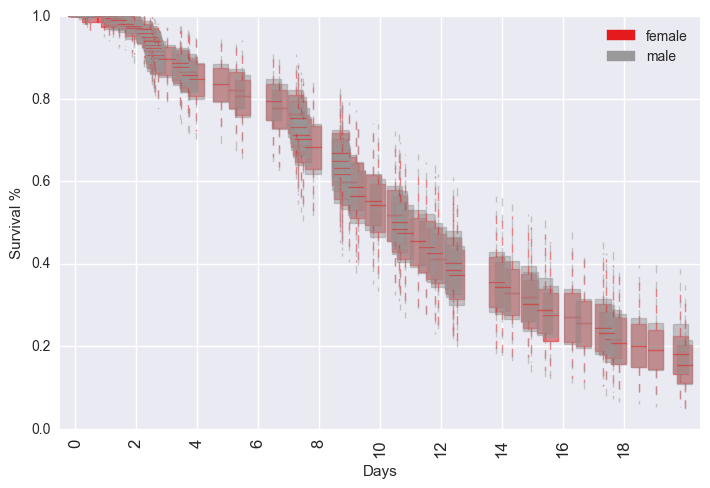

In [8]:
subplot = plt.subplots(1, 1)
survivalstan.utils.plot_pp_survival([testfit], by='sex', subplot=subplot)

In [11]:
%matplotlib inline
py.plot_mpl(subplot[0])

RuntimeError: Cannot get window extent w/o renderer

In [12]:
import plotly.tools as tls
plotly_fig = tls.mpl_to_plotly(subplot[0])
plotly_url = py.plot(plotly_fig)

RuntimeError: Cannot get window extent w/o renderer

In [13]:
ppsurv = survivalstan.utils.prep_pp_survival_data([testfit], by='sex')

In [14]:
ppsurv.head()

,iter,model_cohort,sex,level_3,event_time,survival
0,0,test model,female,0,0.000000,1.000000
1,0,test model,female,1,0.951078,1.000000
2,0,test model,female,2,2.240012,0.983156
3,0,test model,female,3,2.266415,0.961553
4,0,test model,female,4,2.523864,0.957159


In [109]:
data = list()
colors = dict(male='rgb(0, 128, 128)', female='rgb(214, 12, 140)')
for (grp, time), grp_df in ppsurv.groupby(['sex', 'event_time']):
        trace = go.Box(
                        y = grp_df['survival'],
                        x0 = time,
                        name = grp,
                        legendgroup = grp,
                        marker = dict(
                            color = colors[grp],
                        ),
                    )
        data.append(trace)


In [110]:
layout = go.Layout(
    yaxis=dict(
        title='Survival (%)',
        zeroline=False
    ),
    boxmode='group'
)

In [112]:
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

INFO:requests.packages.urllib3.connectionpool:Starting new HTTPS connection (1): plot.ly
